# FINAL PROJECT STUDY GROUP 02

# **I. INTRODUCTION**

Welcome everbody to this notebook! A warm welcome given to you all. As for the short introduction, here are the members of Study Group 02:

- Members: Aco, Alex, Ihsan, Maheswara, Rizky.
- Occupation : Full Time Data Science Hacktiv8 Bootcamp
- Topic of Final Project : RFM Clustering and Time Series Prediction

## 1.1 BUSINESS PROBLEM UNDERSTANDING

### 1.1.1 CONTEXT

### 1.1.2 PROBLEM STATEMENT

### 1.1.3 OBJECTIVES

### 1.1.4 ACTION AND VALUES

## 1.2 ABOUT THE DATA

# **II. IMPORTING LIBRARIES**

In [1]:
# common dataframe
import pandas as pd
import numpy as np
import pickle
import sqlite3
import re
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# math & statistic function
import scipy.stats as stats
import math

# remove all warnings, more robust
import warnings
warnings.filterwarnings("ignore")

# library for model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate

In [2]:
original_path = '../finpro-ftds-001-hck-ftds-001-hck-group-002/'

# **III. DATA LOADING**

In [3]:
df_date_rollup = pd.read_csv('dsc1069_date_rollup.csv')
df_events = pd.read_csv('dsv1069_events.csv')
df_items = pd.read_csv('dsv1069_items.csv')
df_orders = pd.read_csv('dsv1069_orders.csv')
df_users = pd.read_csv('dsv1069_users.csv')

## 3.1 DATA PREVIEW

In [4]:
df_date_rollup.head()

,date,d7_ago,d28_ago
0,2018-06-01 00:00:00,2018-05-25 00:00:00,2018-05-04 00:00:00
1,2018-05-31 00:00:00,2018-05-24 00:00:00,2018-05-03 00:00:00
2,2018-05-30 00:00:00,2018-05-23 00:00:00,2018-05-02 00:00:00
3,2018-05-29 00:00:00,2018-05-22 00:00:00,2018-05-01 00:00:00
4,2018-05-28 00:00:00,2018-05-21 00:00:00,2018-04-30 00:00:00


In [5]:
df_date_rollup.tail()

,date,d7_ago,d28_ago
1973,2013-01-05 00:00:00,2012-12-29 00:00:00,2012-12-08 00:00:00
1974,2013-01-04 00:00:00,2012-12-28 00:00:00,2012-12-07 00:00:00
1975,2013-01-03 00:00:00,2012-12-27 00:00:00,2012-12-06 00:00:00
1976,2013-01-02 00:00:00,2012-12-26 00:00:00,2012-12-05 00:00:00
1977,2013-01-01 00:00:00,2012-12-25 00:00:00,2012-12-04 00:00:00


---

In [6]:
df_events.head()

,event_id,event_time,user_id,event_name,platform,parameter_name,parameter_value
0,b9de71c5c3cc4cd7a97e50b832106e5a,2017-06-26 11:23:39,178481.0,view_item,android,item_id,3526
1,23267713c9ea44419331731f50b6a8db,2017-06-27 10:46:39,178481.0,view_item,android,item_id,1514
2,1b7822fa7b854e01970218ae8f721fe0,2017-06-27 11:15:39,178481.0,view_item,android,item_id,3712
3,2a7a188a626841ac94befcc419f06af4,2016-10-05 20:43:10,154133.0,view_item,android,item_id,3586
4,631d657264cc4616a4528f759509b25d,2016-10-04 03:29:10,154133.0,view_item,android,item_id,1061


In [7]:
df_events.tail()

,event_id,event_time,user_id,event_name,platform,parameter_name,parameter_value
853635,542e24088b464ca7b9a988986dfadb3e,2016-10-22 15:23:09,204159.0,test_assignment,server,test_id,7
853636,3248a35b0c114408bd3d3a876574429b,2016-10-22 15:23:09,174668.0,test_assignment,server,test_id,7
853637,7aaa43025ac64aa9b031d88907a4715e,2016-10-18 15:23:09,184075.0,test_assignment,server,test_id,7
853638,a6c640ffda944ea2bd283e59262d0aa8,2016-10-12 15:23:09,218373.0,test_assignment,server,test_id,7
853639,39b0fca5279649e1ba289300fcaa6aa0,2016-12-02 15:23:09,167256.0,test_assignment,server,test_id,7


---

In [8]:
df_items.head()

,adjective,category,created_at,id,modifier,name,price
0,fuzzy,contraption,2014-01-15 21:36:09,2512.0,carrying_case,fuzzy contraption carrying_case,150.0
1,NaN,instrument,2013-05-14 05:20:50,482.0,refill,instrument refill,35.2
2,industrial-strength,module,2014-02-04 19:28:32,2446.0,NaN,industrial-strength module,300.0
3,digital,tool,2013-02-25 12:23:18,1312.0,carrying_case,digital tool carrying_case,16.5
4,miniature,device,2013-08-05 17:20:45,3556.0,cleaner,miniature device cleaner,16.5


In [9]:
df_items.tail()

,adjective,category,created_at,id,modifier,name,price
2193,prize-winning,apparatus,2013-08-13 04:14:14,3952.0,charger,prize-winning apparatus charger,66.0
2194,fuzzy,dongle,2014-01-16 00:58:43,432.0,wrapper,fuzzy dongle wrapper,12.0
2195,industrial-strength,dongle,2013-12-18 21:37:01,1393.0,refill,industrial-strength dongle refill,72.0
2196,miniature,device,2013-11-27 14:14:47,425.0,NaN,miniature device,27.5
2197,NaN,widget,2013-10-10 21:13:50,325.0,how-to-manual,widget how-to-manual,0.0


---

In [10]:
df_orders.head()

,invoice_id,line_item_id,user_id,item_id,item_name,item_category,price,created_at,paid_at
0,192320.0,83118.0,178481.0,3526.0,digital apparatus,apparatus,330.0,2017-06-28 21:14:25,2017-06-27 21:19:39
1,192320.0,207309.0,178481.0,1514.0,miniature apparatus cleaner,apparatus,99.0,2017-06-28 21:14:25,2017-06-27 21:19:39
2,192320.0,392027.0,178481.0,3712.0,miniature apparatus cleaner,apparatus,99.0,2017-06-28 21:14:25,2017-06-27 21:19:39
3,80902.0,243831.0,154133.0,3586.0,reflective instrument,instrument,57.2,2016-10-09 06:57:30,2016-10-07 10:08:10
4,80902.0,399806.0,154133.0,1061.0,extra-strength instrument charger,instrument,17.6,2016-10-09 06:57:30,2016-10-07 10:08:10


In [11]:
df_orders.tail()

,invoice_id,line_item_id,user_id,item_id,item_name,item_category,price,created_at,paid_at
47397,122276.0,56104.0,92447.0,801.0,reflective device,device,65.000,2016-01-12 06:01:47,2016-01-13 03:45:44
47398,348144.0,162528.0,151538.0,3729.0,prize-winning gadget wrapper,gadget,39.160,2016-11-18 21:00:07,2016-11-18 14:19:52
47399,348144.0,321219.0,151538.0,1645.0,digital gadget carrying_case,gadget,58.740,2016-11-18 21:00:07,2016-11-18 14:19:52
47400,348144.0,264112.0,151538.0,2084.0,matte gadget storage_unit,gadget,278.125,2016-11-18 21:00:07,2016-11-18 14:19:52
47401,348144.0,58354.0,151538.0,2681.0,digital gadget charger,gadget,19.580,2016-11-18 21:00:07,2016-11-18 14:19:52


---

In [12]:
df_users.head()

,created_at,deleted_at,email_address,first_name,id,last_name,merged_at,parent_user_id
0,2014-12-20 07:07:45,NaN,ArataHopper@earthlink.info,Arata,51590.0,Hopper,NaN,NaN
1,2016-10-14 05:39:20,NaN,Riya_Gruber1974@mail.net,Riya,158891.0,Gruber,NaN,NaN
2,2017-01-21 10:20:09,NaN,Peter_Sousa@yahoo.info,Peter,179949.0,Sousa,NaN,NaN
3,2015-10-30 21:31:30,NaN,D_Kowalski1962@gmail.com,D,98000.0,Kowalski,NaN,NaN
4,2015-10-24 16:27:27,NaN,SNovak1966@mail.com,S,93994.0,Novak,NaN,NaN


In [13]:
df_users.tail()

,created_at,deleted_at,email_address,first_name,id,last_name,merged_at,parent_user_id
117173,2013-11-16 03:03:39,NaN,ADavis@inbox.com,A,11045.0,Davis,NaN,NaN
117174,2016-08-23 08:29:02,NaN,TalaAlami1959@mail.info,Tala,152456.0,Alami,NaN,NaN
117175,2017-09-21 14:33:54,NaN,HAmin@mail.info,H,236077.0,Amin,NaN,NaN
117176,2017-07-21 18:47:37,NaN,J_Petrov@gmail.edu,J,218373.0,Petrov,2018-03-14 23:32:16,99787.0
117177,2016-11-13 15:47:51,NaN,MohamedMiller@outlook.com,Mohamed,167256.0,Miller,NaN,NaN


# **IV. DATA CLEANING**

## 4.1 NULL VALUES CHECKING

In [14]:
df_date_rollup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1978 entries, 0 to 1977
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     1978 non-null   object
 1   d7_ago   1978 non-null   object
 2   d28_ago  1978 non-null   object
dtypes: object(3)
memory usage: 46.5+ KB


In [15]:
df_date_rollup.isna().sum()

date       0
d7_ago     0
d28_ago    0
dtype: int64

---

In [16]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853640 entries, 0 to 853639
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   event_id         853640 non-null  object 
 1   event_time       853640 non-null  object 
 2   user_id          853640 non-null  float64
 3   event_name       853640 non-null  object 
 4   platform         853640 non-null  object 
 5   parameter_name   853640 non-null  object 
 6   parameter_value  853640 non-null  object 
dtypes: float64(1), object(6)
memory usage: 45.6+ MB


In [17]:
df_events.isna().sum()

event_id           0
event_time         0
user_id            0
event_name         0
platform           0
parameter_name     0
parameter_value    0
dtype: int64

---

In [18]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   adjective   1926 non-null   object 
 1   category    2198 non-null   object 
 2   created_at  2198 non-null   object 
 3   id          2198 non-null   float64
 4   modifier    1432 non-null   object 
 5   name        2198 non-null   object 
 6   price       2198 non-null   float64
dtypes: float64(2), object(5)
memory usage: 120.3+ KB


In [19]:
df_items.isna().sum()

adjective     272
category        0
created_at      0
id              0
modifier      766
name            0
price           0
dtype: int64

---

In [20]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47402 entries, 0 to 47401
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_id     47402 non-null  float64
 1   line_item_id   47402 non-null  float64
 2   user_id        47402 non-null  float64
 3   item_id        47402 non-null  float64
 4   item_name      47402 non-null  object 
 5   item_category  47402 non-null  object 
 6   price          47402 non-null  float64
 7   created_at     47402 non-null  object 
 8   paid_at        47402 non-null  object 
dtypes: float64(5), object(4)
memory usage: 3.3+ MB


In [21]:
df_orders.isna().sum()

invoice_id       0
line_item_id     0
user_id          0
item_id          0
item_name        0
item_category    0
price            0
created_at       0
paid_at          0
dtype: int64

---

In [22]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117178 entries, 0 to 117177
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   created_at      117178 non-null  object 
 1   deleted_at      2888 non-null    object 
 2   email_address   117178 non-null  object 
 3   first_name      117178 non-null  object 
 4   id              117178 non-null  float64
 5   last_name       117178 non-null  object 
 6   merged_at       6408 non-null    object 
 7   parent_user_id  6408 non-null    float64
dtypes: float64(2), object(6)
memory usage: 7.2+ MB


In [23]:
df_users.isna().sum()

created_at             0
deleted_at        114290
email_address          0
first_name             0
id                     0
last_name              0
merged_at         110770
parent_user_id    110770
dtype: int64

---

`df_items` and `df_users` have missing values.

## 4.2 DUPLICATION CHECKING

In [24]:
df_date_rollup.duplicated().any()

False

In [25]:
df_events.duplicated().any()

False

In [26]:
df_items.duplicated().any()

False

In [27]:
df_orders.duplicated().any()

False

In [28]:
df_users.duplicated().any()

False

# **V. EXPLORATORY DATA ANALYSIS**

Questions to cover:

* How many users do we have? v
* How many users do we lost overtime? v
* How many orders that have been made from 2013 to 2018? v
* What is the number of events for each event name? v
* What is the number of events for each Platform? v
* How many item types are in each category? v
* How many email address for each email domains? v
* How many orders per item category? v
* How many users have made purchases in each item category? v
* How many orders per items? v

Yang belom:

* What is the number of view user profile?
* Show the users who have viewed items?
* What percent of users have viewed items for each product category? r v
* How many orders are placed each day? r v
* What is the most recently viewed item for each user? r v
* How long ago was their most recent view? 
* How many users have reordered an item? r v
* How many users have reordered the same item? r 
* What is the avgerage times each category has ordered? m
* What is the average time between orders? m

m : mahes
r : rizky

We are going to use SQL combine with Pandas to do the Exploratory Data Analysis. First thing we need to do is to define the data into a database by using sqlite3 library. Below is the steps to make the database.

In [29]:
# defining the data
files = ['dsv1069_users.csv','dsv1069_orders.csv','dsv1069_events.csv',
         'dsv1069_items.csv','dsc1069_date_rollup.csv']

In [30]:
# making the connection and cursor
conn = sqlite3.connect('data.db')
c = conn.cursor()

# load the data into the database
for file in files:
    tb_name = ''.join(re.findall('([A-Za-z]+)',file)[1:-1])
    df = pd.read_csv(os.path.join(original_path,file))
    df.to_sql(tb_name, conn, if_exists='append', index=False)

In [31]:
# making the query function
def sq(q):
    with conn:
        return pd.read_sql_query(q, conn)

# the same function but rename the columns to be more readable
def sq1(q):
    with conn:
        return pd.read_sql_query(q, conn).rename(columns=lambda x : x.title().replace('_',' '))

In [32]:
# viewing the tables we have in the database
tables = sq('''
SELECT 
  Name,
  type
FROM 
  sqlite_master 
WHERE 
  type='table' 
''')

tables

,name,type
0,users,table
1,orders,table
2,events,table
3,items,table
4,daterollup,table


In [33]:
counting_total_users = sq('''
                          SELECT COUNT (id)
                          FROM users''')
counting_total_users

,COUNT (id)
0,117178


## 5.1 How many users do we have?

In this section, we are going to count the users that we have including the new users and the deleted users.

First, we need to count the new users over the years. And the cell below is to get the table for counting the new users

In [34]:
#Ceate a table containing the new created users
created_at = sq('''
SELECT
  DATE(created_at) AS DAY,
  COUNT(DISTINCT id) AS users
FROM
  users
WHERE
  deleted_at IS NULL
GROUP BY
  DAY
ORDER BY 
  DAY
''')
created_at.head()

,DAY,users
0,2013-02-18,1
1,2013-02-20,1
2,2013-02-21,1
3,2013-02-22,1
4,2013-02-23,1


The next step is to extract the year from each date and sum aggregation on column `users`.

In [35]:
created_at['YEAR'] = pd.DatetimeIndex(created_at['DAY']).year
created_at

,DAY,users,YEAR
0,2013-02-18,1,2013
1,2013-02-20,1,2013
2,2013-02-21,1,2013
3,2013-02-22,1,2013
4,2013-02-23,1,2013
...,...,...,...
1921,2018-05-28,113,2018
1922,2018-05-29,104,2018
1923,2018-05-30,95,2018
1924,2018-05-31,112,2018


In [36]:
new_created_at = pd.DataFrame(created_at.groupby(['YEAR'], as_index=False)['users'].sum())

In [37]:
new_created_at

,YEAR,users
0,2013,5587
1,2014,14652
2,2015,21152
3,2016,27165
4,2017,31578
5,2018,14156


As we can see from the table above, here is the total users that we have in each year throughout 2013 to 2018:

* 2013 : 5587 users
* 2014	: 14652 users
* 2015 : 21152 users
* 2016 : 27165 users
* 2017 : 31578 users
* 2018 : 14156 users

And this is the total users from 2013 to 2018

In [38]:
a = new_created_at['users'].sum()
print('We have {} users from 2013 to 2018'.format(a))

We have 114290 users from 2013 to 2018


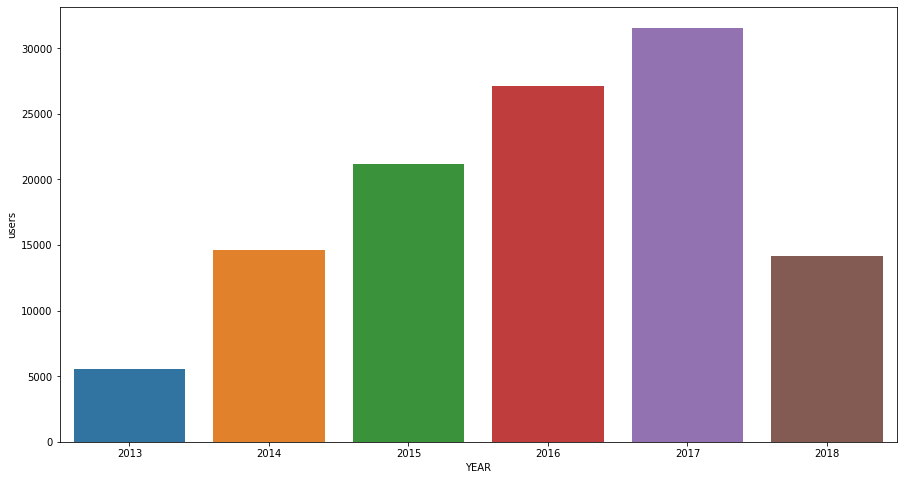

In [39]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=new_created_at, x='YEAR', y='users')

The graph above is the visualization for total users in each year. As we can see, **there is a decrease in the number of new users in 2018.**

In [40]:
df_users.shape

(117178, 8)

## 5.2 How many users do we lost overtime?

Upon looking the table there is a column named `deleted_at`, so there must be some users who had deleted their account. Therefore, I want to count the total of deleted users from 2013 to 2018.

In [41]:
#Ceate a table containing the deleted users

deleted_at = sq('''
SELECT
  DATE(deleted_at) AS DAY,
  COUNT(DISTINCT id) AS deleted_users
FROM
  users
WHERE
  deleted_at IS NOT NULL
GROUP BY
  DAY
''')
deleted_at.head()

,DAY,deleted_users
0,2013-05-13,1
1,2013-07-01,1
2,2013-07-13,1
3,2013-08-05,2
4,2013-08-08,1


In [42]:
deleted_at['YEAR'] = pd.DatetimeIndex(deleted_at['DAY']).year
new_deleted_at = pd.DataFrame(deleted_at.groupby(['YEAR'], as_index=False).sum())
new_deleted_at

,YEAR,deleted_users
0,2013,43
1,2014,300
2,2015,548
3,2016,725
4,2017,890
5,2018,382


As we can see from the table above, here is the total users that we have in each year throughout 2013 to 2018:

* 2013 : 43 users
* 2014 : 300 users
* 2015 : 548 users
* 2016 : 725 users
* 2017 : 890 users
* 2018 : 382 users

In [43]:
aa = new_deleted_at['deleted_users'].sum()
print('We have {} deleted users from 2013 to 2018.'.format(aa))

We have 2888 deleted users from 2013 to 2018.


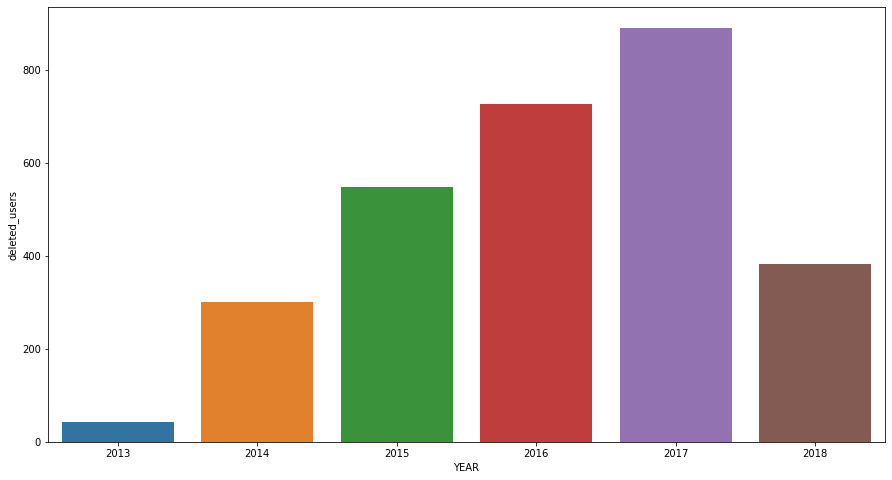

In [44]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=new_deleted_at, x='YEAR', y='deleted_users')

As we can see from the graph above, **2017 has the highest number of users who had deleted their account**.

So, if we sum the new users and deleted users, through 2013 to 2018 there 117178 users. The cell below is the total users (new users + deleted users)

In [45]:
user_count = sq1('''
SELECT 
  COUNT(DISTINCT(id)) as user_count 
FROM 
  users
''').values[0][0]

print('We have {} users'.format(user_count))

We have 117178 users


## 5.3 How many users have made a purchase?

In [46]:
user_with_orders_count = sq1('''
SELECT COUNT(DISTINCT id) as number_of_users_who_have_made_purchases
FROM users u
INNER JOIN orders o
ON u.id = o.user_id
''').values[0][0]

print('We have {} users that have made purchases'.format(user_with_orders_count))

We have 17463 users that have made purchases


## 5.4 How many orders that have been made from 2013 to 2018?

In [47]:
user_with_orders_count = sq1('''
SELECT COUNT(DISTINCT invoice_id) as number_of_invoice
FROM orders o
INNER JOIN users u
ON u.id = o.user_id
''').values[0][0]

print('We have {} orders from 2013 to 2018'.format(user_with_orders_count))

We have 18971 orders from 2013 to 2018


## 5.4 What is the number of events for each event category?

In [48]:
event_name_count = sq1('''
SELECT
  event_name,
  count(*) AS event_count
FROM
  events
GROUP BY
  event_name
ORDER BY 
  event_count DESC
''')
event_name_count

,Event Name,Event Count
0,view_item,525572
1,test_assignment,324980
2,view_user_profile,3088


In [49]:
df_events[df_events['event_name'] == 'test_assignment']['platform'].value_counts()

server    324980
Name: platform, dtype: int64

In [50]:
df_events

,event_id,event_time,user_id,event_name,platform,parameter_name,parameter_value
0,b9de71c5c3cc4cd7a97e50b832106e5a,2017-06-26 11:23:39,178481.0,view_item,android,item_id,3526
1,23267713c9ea44419331731f50b6a8db,2017-06-27 10:46:39,178481.0,view_item,android,item_id,1514
2,1b7822fa7b854e01970218ae8f721fe0,2017-06-27 11:15:39,178481.0,view_item,android,item_id,3712
3,2a7a188a626841ac94befcc419f06af4,2016-10-05 20:43:10,154133.0,view_item,android,item_id,3586
4,631d657264cc4616a4528f759509b25d,2016-10-04 03:29:10,154133.0,view_item,android,item_id,1061
...,...,...,...,...,...,...,...
853635,542e24088b464ca7b9a988986dfadb3e,2016-10-22 15:23:09,204159.0,test_assignment,server,test_id,7
853636,3248a35b0c114408bd3d3a876574429b,2016-10-22 15:23:09,174668.0,test_assignment,server,test_id,7
853637,7aaa43025ac64aa9b031d88907a4715e,2016-10-18 15:23:09,184075.0,test_assignment,server,test_id,7
853638,a6c640ffda944ea2bd283e59262d0aa8,2016-10-12 15:23:09,218373.0,test_assignment,server,test_id,7


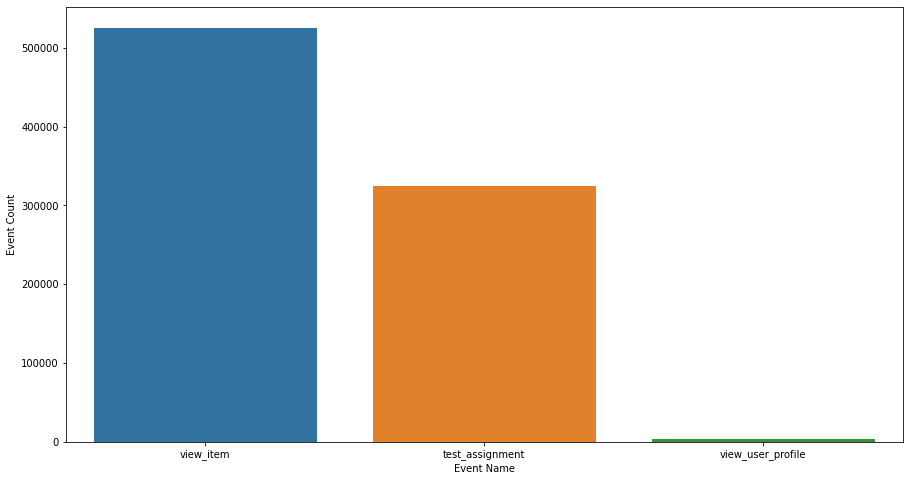

In [51]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=event_name_count, x='Event Name', y='Event Count')

## 5.5 What is the number of events for each Platform?

In [52]:
events_platform_count = sq1('''
SELECT
  platform,
  count(*) AS platform_count
FROM
  events
GROUP BY
  platform
ORDER BY 
  platform_count DESC
''')
events_platform_count

,Platform,Platform Count
0,server,324980
1,web,267421
2,android,87501
3,mobile web,87224
4,iOS,86514


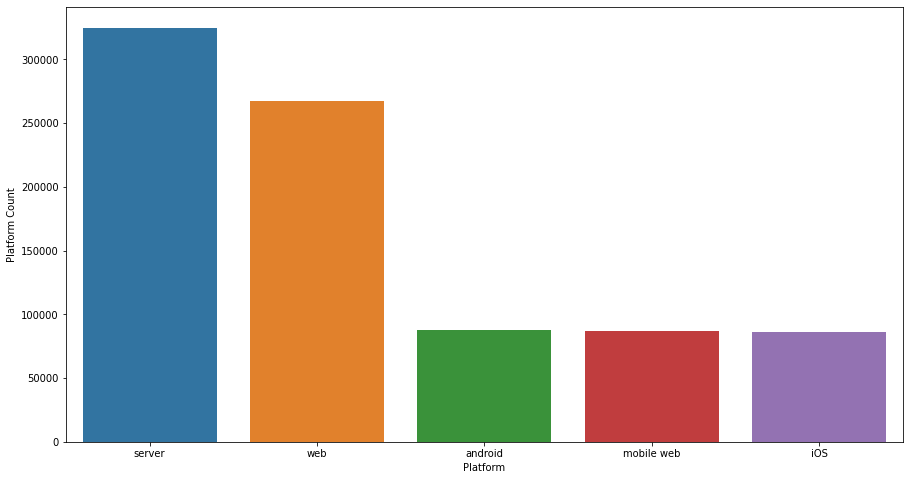

In [53]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=events_platform_count, x='Platform', y='Platform Count')

## 5.6 How many item types are in each category?

In [54]:
items_for_sale = sq1('''
SELECT category,
       COUNT(DISTINCT id) AS item_count
FROM items
GROUP BY category
ORDER BY item_count DESC;
''')

items_for_sale

,Category,Item Count
0,instrument,239
1,gadget,233
2,module,227
3,mechanism,225
4,tool,222
5,device,216
6,widget,212
7,dongle,211
8,apparatus,207
9,contraption,206


In [55]:
items_for_sale['Item Count'].sum()

2198

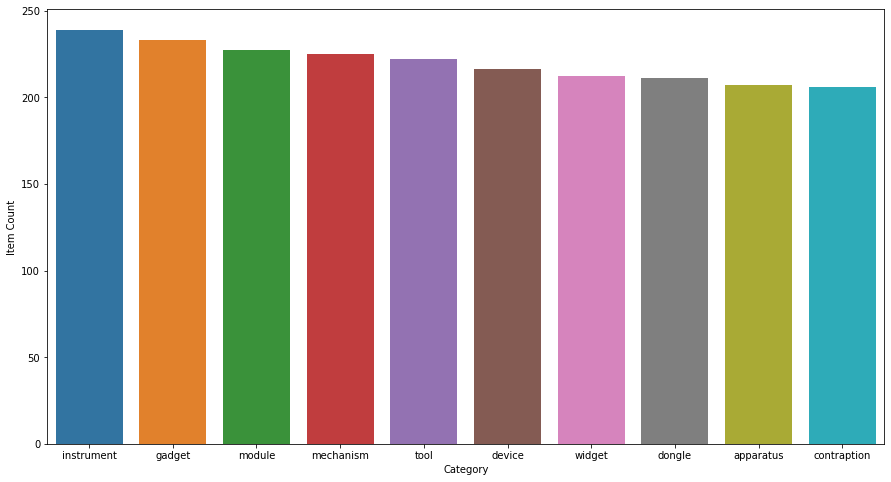

In [56]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=items_for_sale, x='Category', y='Item Count')

## 5.7 How many email address for each email domains?

In [57]:
users = sq('''
SELECT * 
FROM users
''')

users.head()

,created_at,deleted_at,email_address,first_name,id,last_name,merged_at,parent_user_id
0,2014-12-20 07:07:45,None,ArataHopper@earthlink.info,Arata,51590.0,Hopper,None,NaN
1,2016-10-14 05:39:20,None,Riya_Gruber1974@mail.net,Riya,158891.0,Gruber,None,NaN
2,2017-01-21 10:20:09,None,Peter_Sousa@yahoo.info,Peter,179949.0,Sousa,None,NaN
3,2015-10-30 21:31:30,None,D_Kowalski1962@gmail.com,D,98000.0,Kowalski,None,NaN
4,2015-10-24 16:27:27,None,SNovak1966@mail.com,S,93994.0,Novak,None,NaN


In [58]:
#lets see the types of email domains do we have
import numpy as np
e_mail_domains = np.unique(users['email_address'].apply(lambda x:re.findall('@[\w]+'.lower(),x.lower())[0][1:]))
print('We have {} E-Mail domains:\n{}'.format(len(e_mail_domains),e_mail_domains))

We have 6 E-Mail domains:
['earthlink' 'gmail' 'inbox' 'mail' 'outlook' 'yahoo']


In [59]:
email_domain_users_count = pd.DataFrame(columns=e_mail_domains)
for email in e_mail_domains:
    q = '''SELECT COUNT(*)
           FROM users 
           WHERE email_address like '{}' '''.format('%@'+email+'.%')
    count = sq(q).values[0]
    email_domain_users_count[email] = count
email_domain_users_count = email_domain_users_count.T.sort_values(by=0,ascending=False).reset_index().\
                                        rename(columns={0:'Domain users count','index':'Domain name'})
email_domain_users_count

,Domain name,Domain users count
0,gmail,43854
1,outlook,14840
2,yahoo,14712
3,inbox,14657
4,earthlink,14579
5,mail,14536


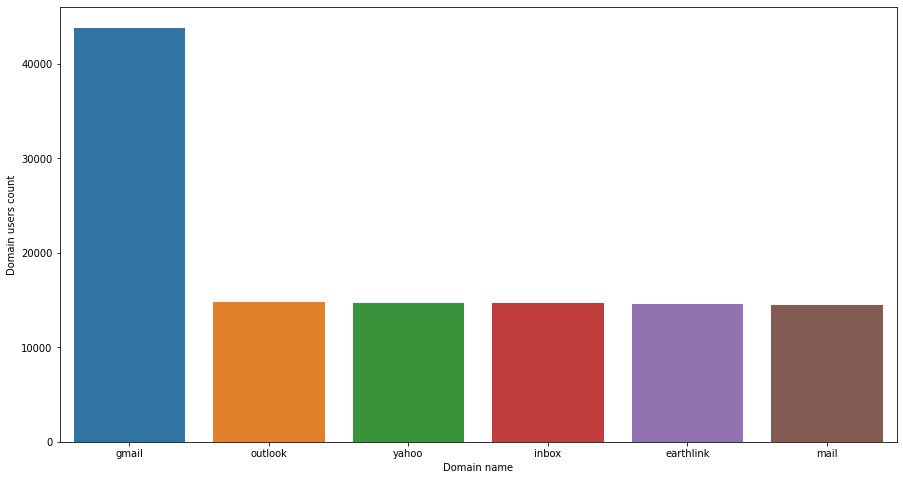

In [60]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=email_domain_users_count, x='Domain name', y='Domain users count')

In [61]:
email_domain_users_count['Domain users count'].sum()

117178

## 5.8 How many orders per item category?

In [62]:
aaaa = sq1('''
SELECT
  category,
  count(*) AS orders_by_category
FROM
  orders
  LEFT JOIN items ON items.id = orders.item_id
GROUP BY
  category
ORDER BY
  orders_by_category DESC;
''')
aaaa

,Category,Orders By Category
0,apparatus,4892
1,widget,4809
2,module,4800
3,instrument,4767
4,device,4735
5,mechanism,4706
6,contraption,4700
7,gadget,4695
8,dongle,4665
9,tool,4633


In [63]:
aaaa['Orders By Category'].sum()

47402

## 5.9 How many users have made purchases in each item category?

In [64]:
b = sq1('''
SELECT
  o.item_category AS category,
  COUNT(DISTINCT COALESCE(parent_user_id, user_id)) AS user_with_orders
FROM
  orders o
  JOIN users u ON u.id = o.user_id
GROUP BY
  o.item_category
ORDER BY
  user_with_orders DESC
''')
b

,Category,User With Orders
0,apparatus,2028
1,widget,2015
2,contraption,2008
3,module,1999
4,instrument,1997
5,device,1994
6,mechanism,1981
7,gadget,1978
8,tool,1971
9,dongle,1963


In [65]:
b['User With Orders'].sum()

19934

## 5.10 How many orders per items?

In [66]:
aaa = sq1('''
SELECT
  item_id,
  name,
  category,
  orders_count
FROM
  (
    SELECT
      item_id,
      count(invoice_id) orders_count
    FROM
      orders
    GROUP BY
      item_id
  ) AS orders
  LEFT JOIN items ON items.id = orders.item_id
ORDER BY
  Orders_Count DESC
''')
aaa

,Item Id,Name,Category,Orders Count
0,3486.0,extra-strength tool opener,tool,40
1,1679.0,matte apparatus wrapper,apparatus,39
2,1119.0,rechargable apparatus carrying_case,apparatus,38
3,1812.0,analog gadget cleaner,gadget,37
4,730.0,organic apparatus carrying_case,apparatus,36
...,...,...,...,...
2193,3946.0,aerodynamic mechanism storage_unit,mechanism,10
2194,1034.0,reflective dongle,dongle,9
2195,2677.0,organic instrument storage_unit,instrument,9
2196,2846.0,prize-winning gadget carrying_case,gadget,9


In [67]:
aaa['Orders Count'].sum()

47402

## 5.11 What percent of users have viewed items for each product category?

In [69]:
view_item_events = c.execute('''
CREATE TABLE IF NOT EXISTS view_item_events AS
  SELECT
    event_id,
    DATE(event_time) AS event_time,
    user_id,
    platform,
    MAX(
      CASE
        WHEN parameter_name = 'item_id' THEN parameter_value
        ELSE NULL
      END
    ) AS item_id,
    MAX(
      CASE
        WHEN parameter_name = 'referrer' THEN parameter_value
        ELSE NULL
      END
    ) AS referrer
  FROM
    events
  WHERE
    event_name = 'view_item'
  GROUP BY
    event_id,
    event_time,
    user_id,
    platform
''')

In [70]:
cat_users_viewed_count = sq1(''' 
WITH view_item_event_category_group AS (
  SELECT
    i.category AS category,
    v.user_id AS user_id
  FROM
    view_item_events v
    LEFT JOIN items i ON i.id = v.item_id
)
SELECT
  category,
  count(DISTINCT user_id) AS users_viewed_count
FROM
  view_item_event_category_group
GROUP BY
  category
''')

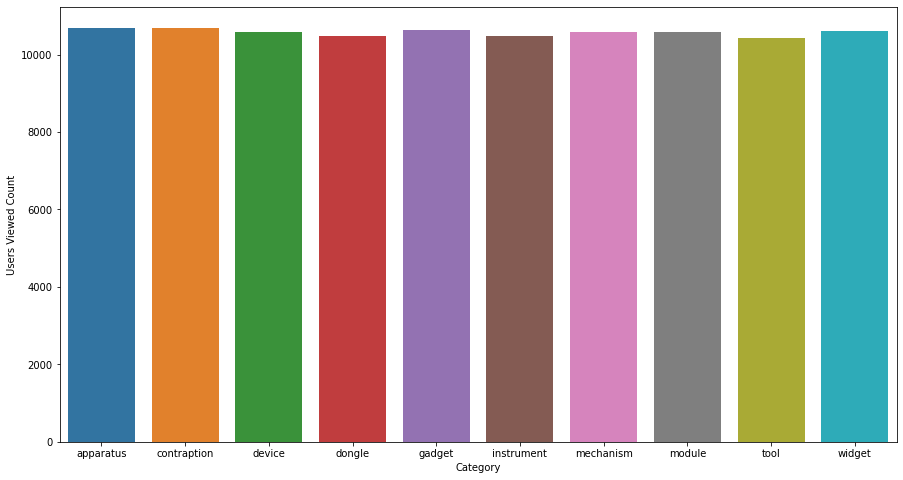

In [71]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=cat_users_viewed_count, x='Category', y='Users Viewed Count')

## 5.12 How many orders are placed each year?

In [72]:
num_each_day = sq1('''
SELECT
  DATE(paid_at) AS DAY,
  COUNT(DISTINCT invoice_id) AS orders,
  COUNT(DISTINCT line_item_id) AS line_items
FROM
  orders
GROUP BY
  DAY
ORDER BY
  DAY DESC;
''')
num_each_day

,Day,Orders,Line Items
0,2018-06-04,4,11
1,2018-06-03,6,15
2,2018-06-02,8,21
3,2018-06-01,8,17
4,2018-05-31,14,32
...,...,...,...
1811,2013-04-13,1,1
1812,2013-04-07,1,3
1813,2013-03-29,1,3
1814,2013-03-27,1,1


In [74]:
num_each_day['YEAR'] = pd.DatetimeIndex(num_each_day['Day']).year
num_each_day

,Day,Orders,Line Items,YEAR
0,2018-06-04,4,11,2018
1,2018-06-03,6,15,2018
2,2018-06-02,8,21,2018
3,2018-06-01,8,17,2018
4,2018-05-31,14,32,2018
...,...,...,...,...
1811,2013-04-13,1,1,2013
1812,2013-04-07,1,3,2013
1813,2013-03-29,1,3,2013
1814,2013-03-27,1,1,2013


In [76]:
new_num_each_day = pd.DataFrame(num_each_day.groupby(['YEAR'], as_index=False)['Orders'].sum())


In [78]:
new_num_each_day

,YEAR,Orders
0,2013,545
1,2014,2253
2,2015,3580
3,2016,4675
4,2017,5414
5,2018,2504


In [79]:
new_num_each_day['Orders'].sum()

18971

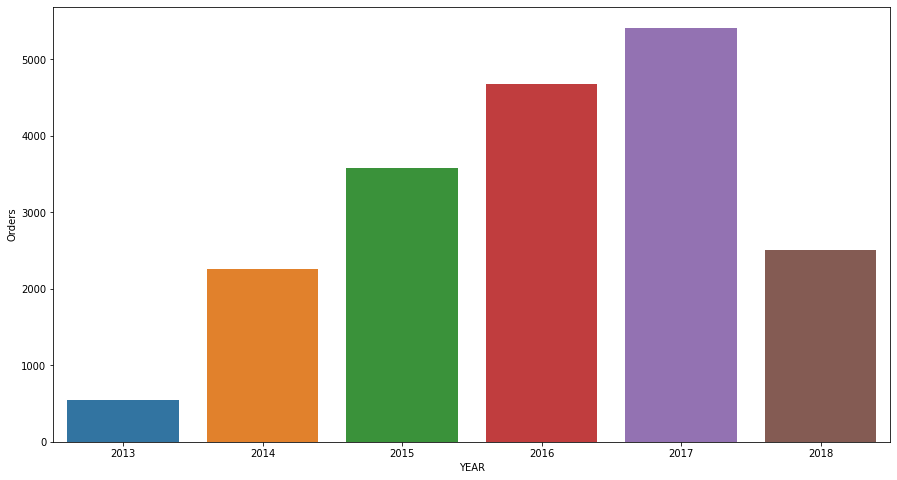

In [77]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=new_num_each_day, x='YEAR', y='Orders')

## 5.13 What is the most recently viewed item for each user?

In [80]:
#first lets create a table with recently viewed events for each user
recent_views = c.execute('''
CREATE TABLE IF NOT EXISTS 'recent_views' AS
SELECT
  user_id,
  item_id,
  event_time,
  ROW_NUMBER() OVER (
    PARTITION BY user_id
    ORDER BY
      event_time DESC
  ) AS row_number,
  RANK() OVER (
    PARTITION BY user_id
    ORDER BY
      event_time DESC
  ) AS rank,
  DENSE_RANK() OVER (
    PARTITION BY user_id
    ORDER BY
      event_time DESC
  ) AS dense_rank
FROM
  view_item_events
''')

In [81]:
recent_views = sq('''SELECT * FROM recent_views''')

In [82]:
c.execute('''
CREATE TABLE IF NOT EXISTS 'full_recent_view' AS
SELECT
  u.id AS user_id,
  (u.first_name || ' ' || u.last_name) AS name,
  i.id AS item_id,
  event_time,
  row_number,
  rank,
  dense_rank,
  u.created_at,
  i.category
FROM
  recent_views r
  LEFT JOIN users u ON r.user_id = u.id
  LEFT JOIN items i ON r.item_id = i.id
''')

In [83]:
full_recent_view = sq('''SELECT * FROM full_recent_view ''')

In [84]:
#now we need to get the needed information about the item they viewed more recently.
sq('''
SELECT u.id AS user_id,
  (u.first_name || ' ' || u.last_name) AS name,
  i.id AS item_id,
  i.name AS item_name,
  event_time,
  row_number,
  u.created_at,
  i.category
from full_recent_view r
JOIN users u
  ON u.id = r.user_id
JOIN items i
  ON i.id = r.item_id
''')

,user_id,name,item_id,item_name,event_time,row_number,created_at,category
0,4.0,L Murphy,3924.0,organic device how-to-manual,2013-09-04,1,2013-03-04 00:06:49,device
1,4.0,L Murphy,2712.0,miniature dongle wrapper,2013-07-05,2,2013-03-04 00:06:49,dongle
2,4.0,L Murphy,2248.0,dongle warmer,2013-07-03,3,2013-03-04 00:06:49,dongle
3,8.0,Hanah Schmidt,2430.0,gadget refill,2013-07-26,1,2013-02-18 22:10:23,gadget
4,8.0,Hanah Schmidt,2079.0,gadget storage_unit,2013-07-25,2,2013-02-18 22:10:23,gadget
...,...,...,...,...,...,...,...,...
262781,298552.0,I Sargsyan,275.0,aerodynamic gadget,2018-06-01,1,2018-05-24 21:34:56,gadget
262782,298817.0,S Miller,931.0,miniature device cleaner,2018-05-28,1,2018-05-29 21:21:09,device
262783,298817.0,S Miller,3806.0,extra-strength device opener,2018-05-26,2,2018-05-29 21:21:09,device
262784,298817.0,S Miller,755.0,extra-strength device wrapper,2018-05-26,3,2018-05-29 21:21:09,device


In [85]:
#now select the most recently viewed for each user(row_view = 1)
c.execute('''
CREATE TABLE IF NOT EXISTS 'recent_view_user' AS
SELECT
  COALESCE(users.parent_user_id, users.id) AS user_id,
  (users.first_name || ' ' || users.last_name) AS name,
  items.id AS item_id,
  items.name AS item_name,
  event_time,
  users.created_at,
  items.category
FROM
  full_recent_view
  JOIN users ON users.id = full_recent_view.user_id
  JOIN items ON items.id = full_recent_view.item_id
  LEFT JOIN orders
  /*LEFT OUTER JOIN to filter the users who viewed and ordered*/
  ON orders.item_id = full_recent_view.item_id
  AND orders.user_id = full_recent_view.user_id
WHERE
  row_number = 1
  AND users.deleted_at IS NOT NULL
  AND orders.item_id IS NULL
''')

In [86]:
sq('''
SELECT * FROM recent_view_user 
''')

,user_id,name,item_id,item_name,event_time,created_at,category
0,193669.0,Mary Scientist,2198.0,aerodynamic gadget,2013-10-09,2013-03-25 00:30:21,gadget
1,214268.0,Santiago Brown,2659.0,matte instrument storage_unit,2013-04-04,2013-03-30 01:20:12,instrument
2,1033.0,Riya Anand,3271.0,miniature instrument refill,2013-08-11,2013-04-21 00:12:36,instrument
3,8442.0,R Wilson,3863.0,fuzzy widget cleaner,2013-09-01,2013-05-04 02:39:12,widget
4,1209.0,S Kruger,334.0,digital widget cleaner,2013-09-28,2013-04-28 10:16:16,widget
...,...,...,...,...,...,...,...
1468,273346.0,Katherine Adams,3016.0,glossy dongle wrapper,2018-03-27,2018-02-22 08:37:47,dongle
1469,276409.0,Noah Ahmad,2410.0,miniature tool warmer,2018-05-08,2018-03-02 17:48:03,tool
1470,278739.0,A Rodriquez,2002.0,analog mechanism,2018-04-24,2018-03-28 14:36:26,mechanism
1471,283645.0,Lisa Kim,2469.0,industrial-strength contraption charger,2018-04-21,2018-04-10 21:25:39,contraption


## 5.14 How many users have reordered an item?

In [87]:
sq1('''
SELECT COUNT(DISTINCT user_id) as users_re_ordered
FROM
  ( SELECT user_id,
           COUNT(DISTINCT invoice_id) AS order_count
   FROM orders
   GROUP BY user_id ) user_level
WHERE order_count > 1;
''')

,Users Re Ordered
0,1421


## 5.15 How many users have reordered the same item?

In [88]:
sq1('''
SELECT
  COUNT(*) as re_order_the_same_item
FROM
  (
    SELECT
      user_id,
      item_id,
      COUNT (DISTINCT line_item_id) AS times_user_ordered
    FROM
      orders
    GROUP BY
      user_id,
      item_id
  )
WHERE
  times_user_ordered > 1;
''')

,Re Order The Same Item
0,211


## 5.16 What is the avgerage times each category has ordered?

In [89]:
sq('''
SELECT item_category,
  AVG(times_category_ordered) AS avg_times_category_ordered
FROM
  (SELECT user_id,
          item_category,
          COUNT(DISTINCT line_item_id) AS times_category_ordered
   FROM orders
   GROUP BY user_id,
            item_category) user_level
GROUP BY item_category
''')

,item_category,avg_times_category_ordered
0,apparatus,2.412229
1,contraption,2.339472
2,device,2.373434
3,dongle,2.376465
4,gadget,2.372410
5,instrument,2.384692
6,mechanism,2.374369
7,module,2.400000
8,tool,2.350583
9,widget,2.385417


## 5.17 What is the average time between orders? Ini belom bener

In [91]:
bc = sq1('''
SELECT first_orders.user_id,
       DATE(first_orders.paid_at) AS first_order_date,
       DATE(second_orders.paid_at) AS second_order_date,
       DATE(second_orders.paid_at) - DATE(first_orders.paid_at) AS date_diff
FROM
    (SELECT user_id,
            invoice_id,
            paid_at,
            DENSE_RANK() OVER (PARTITION BY user_id
                               ORDER BY paid_at ASC) AS order_num
   FROM orders) first_orders
JOIN
  (SELECT user_id,
          invoice_id,
          paid_at,
          DENSE_RANK() OVER (PARTITION BY user_id
                             ORDER BY paid_at ASC) AS order_num
   FROM orders) second_orders
  ON first_orders.user_id = second_orders.user_id
WHERE first_orders.order_num = 1
  AND second_orders.order_num = 2;

''')

In [92]:
bc

,User Id,First Order Date,Second Order Date,Date Diff
0,694.0,2013-04-13,2013-08-18,0
1,694.0,2013-04-13,2013-08-18,0
2,694.0,2013-04-13,2013-08-18,0
3,849.0,2013-07-07,2013-07-31,0
4,849.0,2013-07-07,2013-07-31,0
...,...,...,...,...
8979,284905.0,2018-04-24,2018-05-10,0
8980,284905.0,2018-04-24,2018-05-10,0
8981,284905.0,2018-04-24,2018-05-10,0
8982,284905.0,2018-04-24,2018-05-10,0


In [93]:
bc.describe().T

,count,mean,std,min,25%,50%,75%,max
User Id,8984.0,134331.542297,74203.430835,694.0,70804.0,134319.0,197775.0,284905.0
Date Diff,8984.0,0.195570,0.396661,0.0,0.0,0.0,0.0,1.0
